# LAB3

## Exercise 1

In [4]:
import nltk
from nltk.corpus import webtext

# Download the webtext corpus
nltk.download('webtext')

# Download the tokenizer
nltk.download('punkt')

# Access the firefox.txt file
firefox_text = webtext.raw('firefox.txt')

firefox_tokens = nltk.word_tokenize(firefox_text)

[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### 2. Display the vocabulary size

In [6]:
vocab_size = len(set(firefox_tokens))
vocab_size

9300

### 3. Perform stemming on the text


• Using Porter stemmer:

In [9]:
from nltk import PorterStemmer

porter_stemmer = PorterStemmer()

firefox_porter_stem = [porter_stemmer.stem(token) for token in firefox_tokens]
firefox_porter_stem[:10]

['cooki', 'manag', ':', '``', 'do', "n't", 'allow', 'site', 'that', 'set']

• Using Snowball stemmer:

In [10]:
from nltk import SnowballStemmer

snowball_stemmmer = SnowballStemmer("english")
firefox_snowball_stem = [snowball_stemmmer.stem(token) for token in firefox_tokens]

firefox_snowball_stem[:10]

['cooki', 'manag', ':', '``', 'do', "n't", 'allow', 'site', 'that', 'set']

### 4. Display the vocabulary size after stemming


In [11]:
print(f"The vocabulary size after stemming with PorterStemmer is {len(set(firefox_porter_stem))}")
print("\n")
print(f"The vocabulary size after stemming with SnowballStemmer is {len(set(firefox_snowball_stem))}")

The vocabulary size after stemming with PorterStemmer is 5847


The vocabulary size after stemming with SnowballStemmer is 5702


### 5. Import the stop-words module, and list them

In [12]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
# List the English stopwords
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [14]:

FirefoxFiltered = [w for w in firefox_tokens if w not in stopwords]
print(f"The length of the firefox file after removing stopwords:{len(set(FirefoxFiltered))}")

The length of the firefox file after removing stopwords:9187


Bonus: Check for robustness of stemming for words that end in ing and should be stemmed to the root word.

In [15]:
king ="king"
#lets apply stemming to the word king
print(f"Stemming the word {king} using PorterStemmer gives us {porter_stemmer.stem(king)}")
print(f"Stemming the word {king} using SnowballStemmer gives us {snowball_stemmmer.stem(king)}")

Stemming the word king using PorterStemmer gives us king
Stemming the word king using SnowballStemmer gives us king


### 6. Remove the stop-words from the text

In [16]:
FirefoxFiltered = [w for w in firefox_tokens if w not in stopwords]
FirefoxFiltered[:10]

['Cookie',
 'Manager',
 ':',
 '``',
 'Do',
 "n't",
 'allow',
 'sites',
 'set',
 'removed']

And if we did this experiment after adding Snowball stemming we will get the following results:


In [17]:
Firefox_snowball_stemmed_filtered = [snowball_stemmmer.stem(token) for token in FirefoxFiltered]
Firefox_snowball_stemmed_filtered[:10]


['cooki', 'manag', ':', '``', 'do', "n't", 'allow', 'site', 'set', 'remov']

### 7. Display the vocabulary size

In [18]:
print(f"The length of the firefox file's vocabulary size after removing stopwords:{len(set(FirefoxFiltered))}")
print(f"The length of the firefox file after removing stopwords and stemming:{len(set(Firefox_snowball_stemmed_filtered))}")

The length of the firefox file's vocabulary size after removing stopwords:9187
The length of the firefox file after removing stopwords and stemming:5669


### 8. Create your own stop-word, append to the stop-words list, and apply it


In [19]:
# Define your custom stopwords
custom_stop_words = {'example', 'with', 'is'}

# Combine NLTK stopwords with your custom stopwords
all_stop_words = stopwords.union(custom_stop_words)

# Example text
text = "This is an example sentence with random words."

# Tokenize the text
words = nltk.word_tokenize(text)

# Filter the text by removing stopwords
filtered_text = [word for word in words if word.lower() not in all_stop_words]

print("Original text:", text)
print("Filtered text:", ' '.join(filtered_text))

Original text: This is an example sentence with random words.
Filtered text: sentence random words .


### 9. Calculate the frequency distribution of words, and show them using a wordcloud

In [20]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

fdist = FreqDist(word.lower() for word in firefox_tokens)
fdist

FreqDist({'in': 2203, 'to': 2138, 'the': 1903, 'not': 1727, 'when': 1387, "''": 1330, 'on': 1210, 'a': 1190, 'does': 1064, 'is': 1044, ...})

In [21]:
fdist_stpw = FreqDist(word.lower() for word in FirefoxFiltered)
fdist_stpw

FreqDist({"''": 1330, '.': 1013, "n't": 944, '``': 919, '(': 878, 'page': 866, 'firefox': 849, ')': 799, ':': 676, 'window': 611, ...})

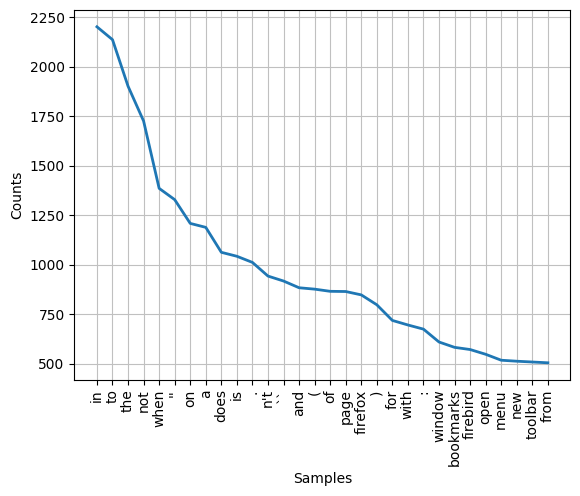

In [22]:
#Plot the frequency distribution of the words
import matplotlib.pyplot as plt
fdist.plot(30, cumulative=False)
plt.show()


#### Plot the wordCloud

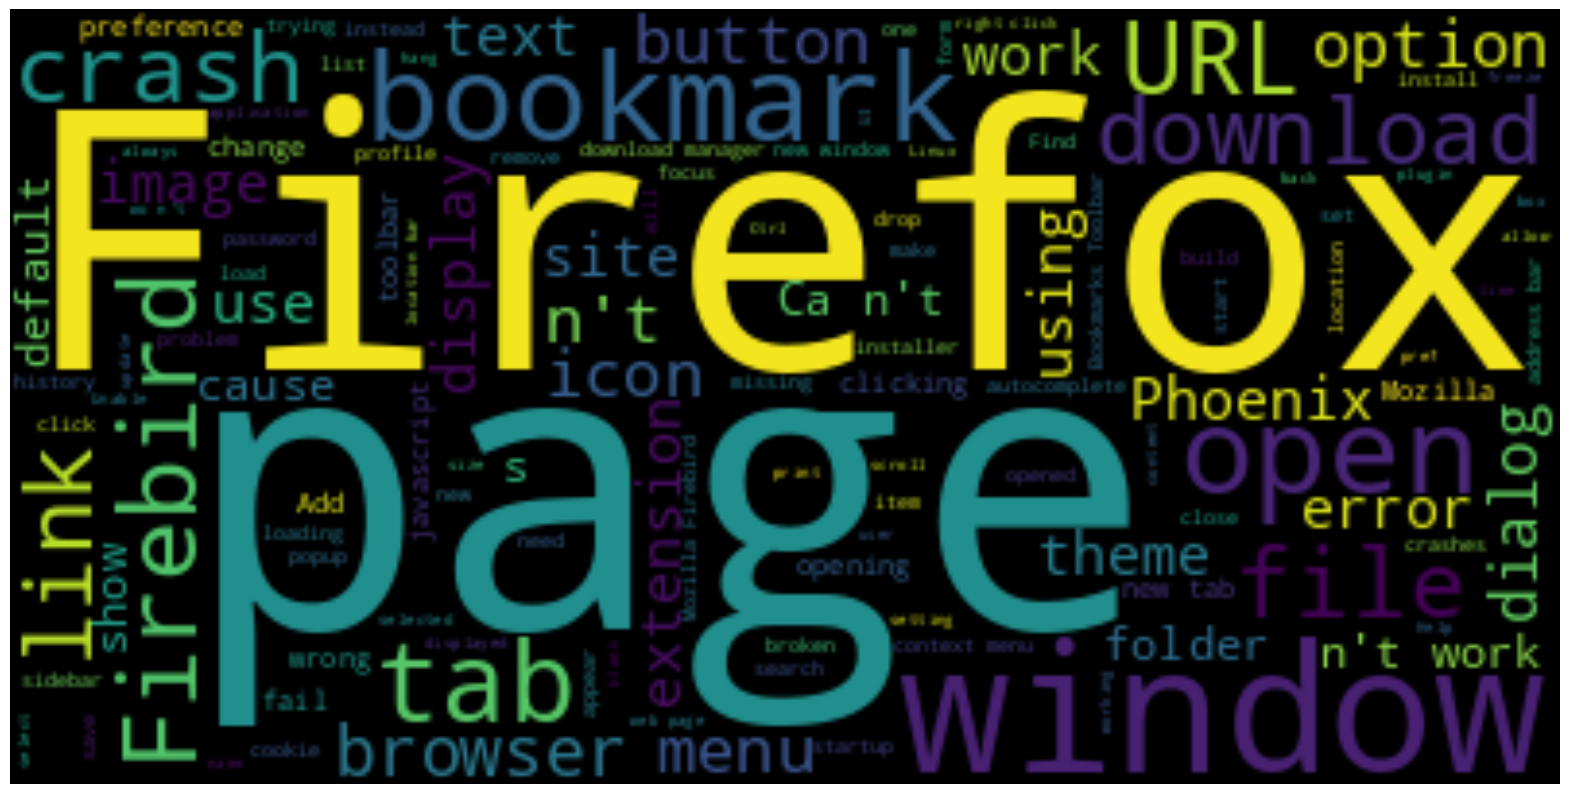

In [23]:
#Display the wordcloud
from wordcloud import WordCloud

# Convert the set of tokens into a single string
text = ' '.join(firefox_tokens)

# Generate the word cloud
wordcloud = WordCloud().generate(text)

# Display the word cloud
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## Exercise 2

### 1. Import auxiliary functions, and open The Treebank Corpus

In [28]:
from nltk.corpus import treebank

# Auxiliary functions:

# Define the ufeatures() class
def ufeatures(utt, idx):
    ftdist = {}
    ftdist['word'] = utt[idx]
    ftdist['dist_from_first'] = idx - 0
    ftdist['dist_from_last'] = len(utt) - idx
    ftdist['capitalized'] = utt[idx][0].upper() == utt[idx][0]
    ftdist['prefix1'] = utt[idx][0]
    ftdist['prefix2'] = utt[idx][:2]
    ftdist['prefix3'] = utt[idx][:3]
    ftdist['suffix1'] = utt[idx][-1]
    ftdist['suffix2'] = utt[idx][-2:]
    ftdist['suffix3'] = utt[idx][-3:]
    ftdist['prev_word'] = '' if idx==0 else utt[idx-1]
    ftdist['next_word'] = '' if idx==(len(utt)-1) else utt[idx+1]
    ftdist['numeric'] = utt[idx].isdigit()
    return ftdist

# Download the Treebank Corpus (if not already done)
nltk.download('treebank')

# Access sentences from the Treebank Corpus
sentences = treebank.sents()

# Example: print the first sentence
print(sentences[0])

# Access parsed sentences
parsed_sentences = treebank.parsed_sents()

# Example: print the parse tree of the first sentence
print('\n', parsed_sentences[0])

['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.']

 (S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (, ,)
    (ADJP (NP (CD 61) (NNS years)) (JJ old))
    (, ,))
  (VP
    (MD will)
    (VP
      (VB join)
      (NP (DT the) (NN board))
      (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
      (NP-TMP (NNP Nov.) (CD 29))))
  (. .))


[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


### 2. Extract the features using the function ufeatures

In [35]:
# Extracted features
features = []

for sentence in (sentences):
    for idx, word in enumerate(sentence):
        features.append(ufeatures(word, idx))

IndexError: string index out of range

In [31]:
features

[{'word': 'Pierre',
  'dist_from_first': 0,
  'dist_from_last': 18,
  'capitalized': True,
  'prefix1': 'P',
  'prefix2': 'Pi',
  'prefix3': 'Pie',
  'suffix1': 'e',
  'suffix2': 're',
  'suffix3': 'rre',
  'prev_word': '',
  'next_word': 'Vinken',
  'numeric': False}]

### 3. Use the tagged sentences (universal tag set) for the ground-truth

### 4. Split the corpus into train and test subsets

### 5. Create a Random Forest classifier, and fit it using the train subset

### 6. Predict the tags of the test subset

### 7. Calculate the performance of the POS tagger

### 8- Show the top features of the model